In [1]:
import pandas as pd
from unidecode import unidecode

In [3]:
ls NISQA/ruslan_taco_val_gen_fp32/NISQA_results.csv


NISQA_results.csv


In [8]:
df = pd.read_csv('NISQA/ruslan_taco_val_gen_fp32/NISQA_results.csv')

In [9]:
df.describe()

,mos_pred,noi_pred,dis_pred,col_pred,loud_pred
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.891276,3.428174,3.744859,3.123819,3.532791
std,0.441670,0.443423,0.383140,0.364161,0.391280
min,2.130096,2.570467,2.931098,2.298896,2.702673
25%,2.552911,3.051538,3.502216,2.900143,3.359932
50%,2.901930,3.463947,3.837868,3.200991,3.597792
75%,3.148217,3.833394,3.939379,3.334332,3.790138
max,4.122599,4.112743,4.381551,4.056811,4.404782


In [3]:
!ls data

Natasha   litres22	       metadata_NATASHA_norm.csv
RUSLAN22  litres_metadata.csv  metadata_RUSLAN_norm.csv


In [100]:
# df = pd.read_csv('data/metadata_RUSLAN_norm.csv', sep='|', header=None)
# df = pd.read_csv('data/metadata_NATASHA_norm.csv', sep='|', header=None)
# df = pd.read_csv('data/litres_metadata.csv', sep='|', header=None)

In [101]:
df.head()

,0,1,2
0,data/litres22/000000.wav,"Я был единственным свободным мужчиной, за столом.","Я б+ыл ед+инственным свободным мужч+иной, за с..."
1,data/litres22/000001.wav,И всеобщего проигрыша.,И все+общего пр+оигрыша.
2,data/litres22/000002.wav,Это верно.,Это в+ерно.
3,data/litres22/000003.wav,Некоторые эмоции вообще невозможно контролиров...,Некоторые эм+оции вообще невозм+ожно контролир...
4,data/litres22/000004.wav,Красивые стихи.,Красивые стих+и.


In [37]:
df = df[~df[0].isin(['005321_RUSLAN', '009017_RUSLAN', '016720_RUSLAN', '021885_RUSLAN', '011906_RUSLAN',
                    '019204_RUSLAN', '020197_RUSLAN', '020199_RUSLAN'])]

Проверим какой словарь

In [102]:
from collections import Counter
letters = Counter()
for index, row in df.iterrows():
    letters.update(row[1].lower())

In [103]:
''.join(sorted(''.join(letters.keys())))

' !,.:?абвгдежзийклмнопрстуфхцчшщъыьэюя'

Если словарь содержит лишние символы, то удалим или заменим их

In [29]:
import re
_re = re.compile(r'"+')
def normalize(text):
    text = text.replace('–', '-')
    text = text.replace('—', '-')
    text = text.replace('…', '...')
    text = text.replace('”', '"')
    text = text.replace('«', '"')
    text = text.replace('»', '"')
    text = text.replace('‑', '-')
    text = text.replace('„', '"')
    text = text.replace('’', '\'')
    text = text.replace('“', '"')
    text = text.replace('*', '')
    text = text.replace('/', '')
    text = text.replace('1', '')
    text = text.replace('4', '')
    text = text.replace('6', '')
    text = re.sub(_re, '"', text)
    return text

In [30]:
df[1] = df[1].apply(lambda x: normalize(x))

In [15]:
# df.to_csv('metadata_NATASHA_norm.csv', sep='|', header=None, index=None)

In [29]:
from tps import download, find
# from tps.data import find
from tps.modules import Emphasizer, BlindReplacer


try:
    stress_dict = find("stress.dict", raise_exception=True)
except FileNotFoundError:
    stress_dict = download("stress.dict")
    
try:
    yo_dict = find("yo.dict", raise_exception=True)
except FileNotFoundError:
    yo_dict = download("yo.dict")
    
try:
    e_dict = find("e.dict", raise_exception=True)
except FileNotFoundError:
    e_dict = download("e.dict")
    

yo_rep = BlindReplacer([yo_dict, "plane"])
e_rep = BlindReplacer([e_dict, "plane"])
emphasizer = Emphasizer([stress_dict, "plane"], True)
# text = "Кроме того, официальная концепция Маяковского‑реалиста требует, по возможности, оторвать его от футуристического окружения, выделить из пестрой литературной среды двадцатых годов, в которой Лиля и Осип Брик занимали достойное и яркое место."
# text = 'деквалификациям'
# emphasizer.process_text(text)
# e_rep.process_text(text)


In [107]:
df[2] = df[1].apply(lambda x: emphasizer.process_text(e_rep.process_text(yo_rep.process_text(x))))
df[3] = df[2].apply(lambda x: len(x))
df = df[(df[3] < 500) & (df[3] > 20)]
# df = df[df[5] > 15]

In [109]:
df[3].min()

21

In [110]:
!ls data

Natasha   litres22	       metadata_NATASHA_norm.csv
RUSLAN22  litres_metadata.csv  metadata_RUSLAN_norm.csv


In [66]:
# Добавляем путь к данным 
# data_dir = "data/RUSLAN22/"
# df[0] = df[0].apply(lambda x: data_dir + x + '.wav')

data_dir = "data/Natasha/"
df[0] = df[0].apply(lambda x: data_dir + x)

In [111]:
df.head()

,0,1,2,3
0,data/litres22/000000.wav,"Я был единственным свободным мужчиной, за столом.","Я б+ыл ед+инственным свободным мужч+иной, за с...",53
1,data/litres22/000001.wav,И всеобщего проигрыша.,И все+общего пр+оигрыша.,24
3,data/litres22/000003.wav,Некоторые эмоции вообще невозможно контролиров...,Некоторые эм+оции вообще невозм+ожно контролир...,52
5,data/litres22/000005.wav,Мы пришли к мирному существованию.,Мы пришл+и к м+ирному существов+анию.,37
6,data/litres22/000006.wav,"Ойро пытается уклониться, но снег попадает ей ...","Ойро пыт+ается уклон+иться, но сн+ег попадает ...",188


In [112]:
from scipy.io.wavfile import read
import IPython.display as ipd
sampling_rate, data = read(df[0][0])
ipd.Audio(data, rate=sampling_rate) 

In [113]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.1, random_state=42)

In [118]:
ls filelists/

litres_data_train.txt
litres_data_train_emp.txt
litres_data_val.txt
litres_data_val_emp.txt
ljs_audio_text_test_filelist.txt*
ljs_audio_text_train_filelist.txt*
ljs_audio_text_train_subset_1250_filelist.txt
ljs_audio_text_train_subset_2500_filelist.txt
ljs_audio_text_train_subset_300_filelist.txt
ljs_audio_text_train_subset_625_filelist.txt
ljs_audio_text_train_subset_64_filelist.txt
ljs_audio_text_val_filelist.txt*
ljs_mel_text_filelist.txt
ljs_mel_text_test_filelist.txt
ljs_mel_text_train_filelist.txt
ljs_mel_text_train_subset_1250_filelist.txt
ljs_mel_text_train_subset_2500_filelist.txt
ljs_mel_text_train_subset_625_filelist.txt
ljs_mel_text_val_filelist.txt
natasha_data_train.txt
natasha_data_train_emp.txt
natasha_data_val.txt
natasha_data_val_emp.txt
ruslan_data_train.txt
ruslan_data_train_emp.txt
ruslan_data_val.txt
ruslan_data_val_emp.txt


In [116]:
train.shape, val.shape

((23373, 4), (2597, 4))

In [117]:
# speacker = 'ruslan'
# speacker = 'natasha'
speacker = 'litres'

train[[0, 1]].to_csv(f'filelists/{speacker}_audio_text_train.txt', header=None, index=None, sep='|')
val[[0, 1]].to_csv(f'filelists/{speacker}_audio_text_val.txt', header=None, index=None, sep='|')

train[[0, 2]].to_csv(f'filelists/{speacker}_audio_text_train_emp.txt', header=None, index=None, sep='|')
val[[0, 2]].to_csv(f'filelists/{speacker}_audio_text_val_emp.txt', header=None, index=None, sep='|')



In [209]:
!ls filelists/

litres_audio_text_train.txt
litres_audio_text_train_emp.txt
litres_audio_text_val.txt
litres_audio_text_val_emp.txt
litres_mel_text_train.txt
litres_mel_text_train_emp.txt
litres_mel_text_val.txt
litres_mel_text_val_emp.txt
ljs_audio_text_test_filelist.txt
ljs_audio_text_train_filelist.txt
ljs_audio_text_train_subset_1250_filelist.txt
ljs_audio_text_train_subset_2500_filelist.txt
ljs_audio_text_train_subset_300_filelist.txt
ljs_audio_text_train_subset_625_filelist.txt
ljs_audio_text_train_subset_64_filelist.txt
ljs_audio_text_val_filelist.txt
ljs_mel_text_filelist.txt
ljs_mel_text_test_filelist.txt
ljs_mel_text_train_filelist.txt
ljs_mel_text_train_subset_1250_filelist.txt
ljs_mel_text_train_subset_2500_filelist.txt
ljs_mel_text_train_subset_625_filelist.txt
ljs_mel_text_val_filelist.txt
natasha_audio_text_train.txt
natasha_audio_text_train_emp.txt
natasha_audio_text_val.txt
natasha_audio_text_val_emp.txt
natasha_mel_text_train.txt
natasha_mel_text_train_emp.txt
natasha_mel_text_val.tx

In [21]:
# train[0].to_csv('waveglow/ruslan_data_train_audio.txt', header=None, index=None, sep='|')
# val[0].to_csv('waveglow/ruslan_data_val_audio.txt', header=None, index=None, sep='|')

In [141]:
def wav2mel(row):
    x = row.split('/')
    x[-2] = 'mels'
    x[-1] = x[-1][:-3] + 'pt'
    return '/'.join(x)

In [208]:
# speacker = 'ruslan'
speackers = ['natasha', 'ruslan', 'litres']
# speacker = 'litres'
modes = ['train_emp', 'train', 'val', 'val_emp']

for speacker in speackers:
    for mode in modes:
        df = pd.read_csv(f'filelists/{speacker}_audio_text_{mode}.txt', sep='|', header=None)
        df[0] = df[0].apply(lambda x: wav2mel(x))
        df.to_csv(f'filelists/{speacker}_mel_text_{mode}.txt', sep='|', header=None, index=None)

In [211]:
ls

Dockerfile                inference.py              run_latency_tests.sh
Dockerfile_triton_client  inference_perf.py         run_latency_tests_cpu.sh
LICENCE                   loss_functions.py         scripts/
README.md                 main.py                   tacotron2/
audio/                    models.py                 tacotron2_common/
checkpoints/              multiproc.py              tensorrt/
config.json               notebooks/                test_infer.py
data/                     phrases/                  test_infer.sh
data_functions.py         platform/                 train.py
exports/                  prepare_train_file.ipynb  trtis_cpp/
filelists/                preprocess_audio2mel.py   waveglow/
img/                      requirements.txt


Форматирование wav

In [4]:
speacker = 'ruslan'
mode = 'val'
df = pd.read_csv(f'filelists/{speacker}_mel_text_{mode}.txt', sep='|', header=None)

In [5]:
df[0][0]

'data/RUSLAN22/mels/001413_RUSLAN.pt'

In [11]:
import torch
%matplotlib inline
import matplotlib

import matplotlib.pylab as plt
melspec = torch.load(df[0][0])

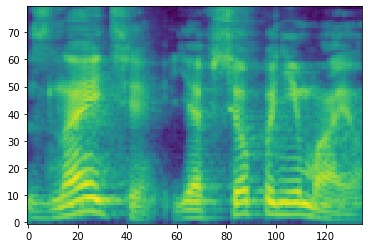

In [12]:
plt.imshow(melspec.data.cpu().numpy(), aspect='auto', interpolation='none', origin='lower')

In [ ]:
# !sox /root/storage/nastya/data/litres22/005359.wav -b 16 litres.wav gain -1 rate 22050 dither -s
# !sox --info -V255 /root/storage/nastya/data/litres22/000002.wav

In [36]:
import glob
import subprocess

for i, row in df.iterrows():
#     print(row[6])
#   wav = filename.split('/')[-1]
#   new_filename = "RUSLAN22/" + wav
  # print(new_filename)
  # subprocess.call("sox" + filename + "-c 1 -r 22050" + new_filename, shell=True)
    subprocess.run(["sox", row[1], "-c 1", "-b 16", row[6], "gain", "-1", "rate", "22050", "dither", "-s"])

### mfa preprocess

In [19]:
from tps import symbols as smb
import re
punct = '!\'"(),.:;? +' + '-'
# + '…'
_punct_re = re.compile("[{}]".format(punct))
def split_to_tokens(text, punct_re=None):
    punct_re = _punct_re if punct_re is None else punct_re
    prepared = punct_re.sub(lambda elem: "⁑{}⁑".format(elem.group(0)), text)
    prepared = prepared.split("⁑")
    prepared = [t for t in prepared if t != ""]

    return prepared

In [20]:
phonem_df = pd.read_csv('ruslan_all_phonems.txt', header=None, sep='\t')

In [21]:
phonem_df

,0,1,2,3,4,5
0,<eps>,1.00,0.00,0.00,0.00,sil
1,<unk>,0.99,0.39,1.22,0.94,spn
2,[bracketed],0.99,0.53,1.50,0.84,spn
3,а,0.03,0.07,2.25,0.50,a
4,а,0.99,0.05,2.88,0.28,ɐ
...,...,...,...,...,...,...
447251,вахтерша,1.00,0.00,0.00,0.00,v a x tʲ ɪ r ʂ ə
447252,вахтерша,1.00,0.00,0.00,0.00,v ə x tʲ ɪ r ʂ ə
447253,диссидентствующий,1.00,0.00,0.00,0.00,dʲ ɪ sʲː ɪ dʲ e n̪ t̪ s̪ t̪ v ʊ j ʉ ɕː ɪ j
447254,необозримым,1.00,0.00,0.00,0.00,ɲ ɪ ə b ɐ z̪ rʲ i m ɨ m


In [22]:
from collections import Counter
i = 0
letters = Counter()
for index, row in phonem_df.iterrows():
#     print(row[0], ''.join(row[5].split()))
    letters.update(row[5].split(' '))
#     i+= 1
#     if i == 10:
#         break

In [23]:
letters.keys()

dict_keys(['sil', 'spn', 'a', 'ɐ', 'mʲ', 'pʲ', 'e', 'r', 'ə', 'k', 'm', 'ɪ', 'x', 'c', 'f', 'ʊ', 'ɨ', 'n̪', 'ɟ', 'tɕ', 'j', 'o', 'vʲ', 't̪s̪', 's̪', 'ɕː', 'ɲ', 'ç', 'p', 'b', 'sʲ', 'd̪', 'd̪ː', 'ʐ', 'u', 'rʲ', 'z̪', 'zʲ', 'i', 't̪', 'tʲ', 'ʎ', 'ɫ', 'v', 'ɡ', 'ʂ', 'ɛ', 'bː', 'bʲː', 'bʲ', 'dʲ', 'dʐː', 'ɫː', 'rː', 'n̪ː', 'sʲː', 't̪s̪ː', 'fʲ', 's̪ː', 'ʉ', 'vː', 'vʲː', 'pː', 'pʲː', 'ɵ', 'æ', 'ɲː', 'tɕː', 'ɣ', 'ɟː', 'dʲː', 'kː', 'cː', 'ʎː', 'jː', 'd̪z̪', 't̪ː', 'mː', 'mʲː', 'rʲː', 'tʂ', 'tʲː', 'fʲː', 'fː', 'ʂː', 'dzʲː', 'd̪z̪ː', 'ʐː', 'z̪ː', 'tʂː', 'ɕ', 'ʑː', 'ɡː', 'xː', 'zʲː', 'tsʲ'])

In [24]:
# phonem_dict = {row[0]: row[5] for index, row in phonem_df.iterrows()}

In [25]:
phonem_dict = {}
for index, row in phonem_df.iterrows():
    if row[0] not in phonem_dict:
        phonem_dict[row[0]] = row[5]

In [26]:
phonem_dict['прометей'].split(' ')


['p', 'r', 'ɐ', 'mʲ', 'e', 'tʲ', 'ɪ', 'j']

In [34]:
df[1].values

array(['С тревожным чувством берусь я за перо.',
       'Кого интересуют признания литературного неудачника?',
       'Что поучительного в его исповеди?', ...,
       'Он начинает преобразовывать жизнь, достигая иногда курьезных мичуринских результатов. ',
       'Допустим, выводит морковь, совершенно неотличимую от картофеля. В общем, создает новую человеческую породу. ',
       'Известно, чем это кончается... Что в этой ситуации предпринимает моралист? Он тоже пытается достичь гармонии.'],
      dtype=object)

In [35]:
split_to_tokens('Известно, чем это кончается... Что в этой ситуации предпринимает моралист? Он тоже пытается достичь гармонии.', _punct_re)

['Известно',
 ',',
 ' ',
 'чем',
 ' ',
 'это',
 ' ',
 'кончается',
 '.',
 '.',
 '.',
 ' ',
 'Что',
 ' ',
 'в',
 ' ',
 'этой',
 ' ',
 'ситуации',
 ' ',
 'предпринимает',
 ' ',
 'моралист',
 '?',
 ' ',
 'Он',
 ' ',
 'тоже',
 ' ',
 'пытается',
 ' ',
 'достичь',
 ' ',
 'гармонии',
 '.']

In [36]:
punct

'!\'"(),.:;? +-'

In [27]:
def g2p(sentence):
    new_sentence = ['{']
    is_correct = True
    sentence = sentence.lower()
    for word in split_to_tokens(sentence, _punct_re):
        if word in phonem_dict:
            new_sentence.append(phonem_dict[word])
        elif word in punct:
#             new_sentence.append(' ')
#             if word == ' ':
#                 new_sentence.append("# ")
#             else:
            new_sentence.append(word)
        else:
            is_correct = False
    new_sentence.append('}')
    return ''.join(new_sentence) if is_correct else None

In [28]:
g2p('Известно, чем это кончается... Что в этой ситуации предпринимает моралист? Он тоже пытается достичь гармонии.').split(' ')

['{ɪ',
 'z̪',
 'vʲ',
 'e',
 's̪',
 'n̪',
 'ə,',
 'tɕ',
 'e',
 'm',
 'ɛ',
 't̪',
 'ə',
 'k',
 'ɐ',
 'ɲ',
 'tɕ',
 'æ',
 'j',
 'ɪ',
 't̪',
 's̪',
 'ə...',
 'ʂ',
 't̪',
 'o',
 'f',
 'ɛ',
 't̪',
 'ə',
 'j',
 'sʲ',
 'ɪ',
 't̪',
 'ʊ',
 'a',
 't̪s̪',
 'ɨ',
 'ɪ',
 'p',
 'rʲ',
 'ɪ',
 't̪',
 'p',
 'rʲ',
 'ɪ',
 'ɲ',
 'ɪ',
 'm',
 'a',
 'j',
 'ɪ',
 't̪',
 'm',
 'ə',
 'r',
 'ɐ',
 'ʎ',
 'i',
 's̪',
 't̪?',
 'o',
 'n̪',
 't̪',
 'o',
 'ʐ',
 'ɨ',
 'p',
 'ɨ',
 't̪',
 'a',
 'j',
 'ɪ',
 't̪',
 's̪',
 'ə',
 'd̪',
 'ɐ',
 'sʲ',
 'tʲ',
 'i',
 'tɕ',
 'ɡ',
 'ɐ',
 'r',
 'm',
 'o',
 'ɲ',
 'ɪ',
 'ɪ.}']

In [29]:
df[7] = df[1].apply(lambda x: g2p(x))

In [30]:
g2p(df[1][1000])

'{f o r m ɨ ɪ dʲ ɪ ə ɫ ɐ ɟ i tɕ ɪ s̪ k ə j dʲ ɪ vʲ e r sʲ ɪ ɪ s̪ ə vʲ ɪ r ʂ ɛ n̪ s̪ t̪ v ʊ j ʊ t̪ s̪ ə, s̪ t̪ ɐ n̪ o vʲ ə t̪ s̪ ə ʊ t̪ ɐ ɲ tɕ e ɲː ɪ j e i r ə z̪ n̪ ɐ ɐ b r a zʲ ɲ e j e, i s̪ ɛ tʲ ɪ m n̪ a d̪ ə rʲ ɪ ʂ ɨ tʲ ɪ ʎ n̪ ə b ɐ r o t̪ s̪ː ə, ɲ e d̪ ə p ʊ s̪ k a j ə ʎ ɪ bʲ ɪ r ɐ ʎ i z̪ m ə.}'

In [31]:
phonem_dict['кончается']

'k ɐ ɲ tɕ æ j ɪ t̪ s̪ ə'

In [32]:
df[7]

0        {s̪ t̪ rʲ ɪ v o ʐ n̪ ɨ m tɕ u s̪ t̪ v ə m bʲ ɪ...
1        {k ɐ v o ɪ ɲ tʲ ɪ rʲ ɪ s̪ u j ʊ t̪ p rʲ ɪ z̪ n...
2        {ʂ t̪ o p ə ʊ tɕ i tʲ ɪ ʎ n̪ ə v ə f j ɪ v o i...
3        {d̪ a i ʐ ɨ zʲ ɲ m o j ə ʎ ɪ ʂ ɨ n̪ a v ɲ e ʂ ...
4                {j a ɐ p s̪ ɐ ʎ u t̪ n̪ ə z̪ d̪ ɐ r o f.}
                               ...                        
22195    {m ɨ ʐ a ʐ dʲ ɪ m s̪ ə vʲ ɪ r ʂ ɛ n̪ s̪ t̪ v ə...
22196    {rʲ ɪ v ə ʎ ʊ t̪s̪ ɨ ɐ ɲ e r dʲ e ɫ ə j ɪ t̪ p...
22197    {o n̪ n̪ ə tɕ ɪ n̪ a j ɪ t̪ p rʲ ɪ ə b r ɐ z̪ ...
22198    {d̪ ɐ p u sʲ tʲ ɪ m, v ɨ v o dʲ ɪ t̪ m ɐ r k o...
22199    {ɪ z̪ vʲ e s̪ n̪ ə, tɕ e m ɛ t̪ ə k ɐ ɲ tɕ æ j...
Name: 7, Length: 21408, dtype: object

In [33]:
df = df[df[7].notna()]

In [34]:
df[7][0]

'{s̪ t̪ rʲ ɪ v o ʐ n̪ ɨ m tɕ u s̪ t̪ v ə m bʲ ɪ r u sʲ j a z̪ ə pʲ ɪ r o.}'

In [35]:
from collections import Counter
letters = Counter()
for index, row in df.iterrows():
#     if 'э' in row[7]:
#         print(row[0], row[1], row[7])
    letters.update(row[7].lower())

In [65]:
letters

Counter({'s': 78728,
         '̪': 222492,
         ' ': 1769492,
         '#': 255315,
         't': 112635,
         'r': 67356,
         'ʲ': 129960,
         'ɪ': 117595,
         'v': 50219,
         'o': 47554,
         'ʐ': 13587,
         'n': 54821,
         'ɨ': 42376,
         'm': 46142,
         'ɕ': 22397,
         'u': 18922,
         'ə': 106845,
         'b': 22791,
         'j': 58164,
         'a': 67796,
         'z': 24322,
         'p': 36240,
         '.': 44439,
         'k': 38620,
         'ɐ': 68868,
         'ɲ': 30593,
         'ʊ': 28960,
         'ʎ': 32355,
         'd': 38010,
         '?': 3905,
         'ʂ': 15782,
         'i': 36714,
         'f': 20443,
         'e': 53935,
         'ɟ': 4108,
         'ʉ': 2727,
         'æ': 3863,
         'ː': 16112,
         'ɡ': 13501,
         ',': 20640,
         'ɫ': 37863,
         'c': 11597,
         'x': 11611,
         'ɛ': 8297,
         '!': 2479,
         '-': 12873,
         'ɵ': 355,
         'ç':

In [36]:
train, val = train_test_split(df, test_size=0.1, random_state=42)

In [37]:
train[[0, 7]].to_csv('filelists/ruslan_data_train_phonems.txt', header=None, index=None, sep='|')
val[[0, 7]].to_csv('filelists/ruslan_data_val_phonems.txt', header=None, index=None, sep='|')

In [71]:
df.shape

(21271, 8)